<a href="https://colab.research.google.com/github/yonatan-co/disaster_not_disaster_classification_tensorflow/blob/main/bert_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## setup

In [1]:
!pip install pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 4.5 MB/s 
     |████████████████████████████████| 99 kB 6.4 MB/s 
     |████████████████████████████████| 1.1 MB 44.9 MB/s 
     |████████████████████████████████| 238 kB 61.0 MB/s 
     |████████████████████████████████| 5.9 MB 38.5 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 352 kB 51.5 MB/s 
     |████████████████████████████████| 116 kB 57.5 MB/s 
     |████████████████████████████████| 1.3 MB 52.4 MB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 4.6 MB 47.1 MB/s 
     |████████████████████████████████| 511.8 MB 8.7 kB/s 
     |████████████████████████████████| 511.7 MB 6.8 kB/s 
     |████████████████████████████████| 511.7 MB 4.9 kB/s 
     |████████████████████████████████| 4.9 MB 58.3 MB/s 


In [2]:
!pip install tensorflow -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.10.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (578.0 MB)
     |████████████████████████████████| 5.9 MB 4.5 MB/s 
     |████████████████████████████████| 1.7 MB 54.1 MB/s 
     |████████████████████████████████| 438 kB 39.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5

In [3]:
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 497.9 MB 33 kB/s 
     |████████████████████████████████| 462 kB 72.7 MB/s 
     |████████████████████████████████| 5.8 MB 54.6 MB/s 
     |████████████████████████████████| 1.4 MB 57.0 MB/s 


In [4]:
!pip tensorflow_text.__version__

ERROR: unknown command "tensorflow_text.__version__"


In [5]:
import tensorflow_text

In [6]:
!wget https://raw.githubusercontent.com/yonatan-co/t_helpers/main/helpers.py

--2022-10-12 11:09:36--  https://raw.githubusercontent.com/yonatan-co/t_helpers/main/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11263 (11K) [text/plain]
Saving to: ‘helpers.py’

helpers.py          100%[===================>]  11.00K  --.-KB/s    in 0.001s  

2022-10-12 11:09:36 (19.4 MB/s) - ‘helpers.py’ saved [11263/11263]



In [7]:
from helpers import unzip_data, plot_history, create_tensorboard_callback, make_confusion_matrix, compare_historys

In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-10-12 11:09:36--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-10-12 11:09:36 (106 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## data preprocessing


In [9]:
unzip_data('nlp_getting_started.zip')


In [10]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

train_df.head(), test_df.head()

(   id keyword location                                               text  \
 0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
 1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
 2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
 3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
 4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
 
    target  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
    id keyword location                                               text
 0   0     NaN      NaN                 Just happened a terrible car crash
 1   2     NaN      NaN  Heard about #earthquake is different cities, s...
 2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
 3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
 4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan)

In [11]:
train_df = train_df.sample(frac=1, random_state=42)


train_df.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


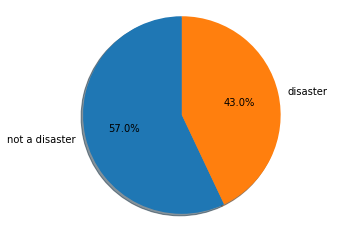

In [12]:
import matplotlib.pyplot as plt



labels = ['not a disaster', 'disaster']
values = [train_df.target.value_counts()[0], train_df.target.value_counts()[1]]


fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')


plt.show()

In [13]:
import random

rand_index = random.randint(0, len(train_df)-5)

for row in train_df[["text", "target"]][rand_index:rand_index+5].itertuples():
  _, text, target = row
  print(
  f"""
    tweet:
    {text}
    target: {("disaster" if target == 1 else "not a disaster")}
  """)


    tweet:
    Robot_Rainstorm: We have two vacancies on the #Castle Fantasy Football team! Join us. ItÛªs fun. ??
    target: not a disaster
  

    tweet:
    SB57 [NEW] Deepwater Horizon Oil Spill distribution of funds from BP settlement road and bridge projects in Bal... http://t.co/dKpsrkG6pc
    target: disaster
  

    tweet:
    E-Hutch is da bomb ?? http://t.co/aqmpxzo3V1
    target: not a disaster
  

    tweet:
    &gt;&gt; $15 Aftershock : Protect Yourself and Profit in the Next Global Financial... ##book http://t.co/f6ntUc734Z
@esquireattire
    target: not a disaster
  

    tweet:
    Thunder???
    target: not a disaster
  


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_tweets, val_tweets, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                train_df["target"].to_numpy(),
                                                                test_size=0.1,
                                                                random_state=42)

In [16]:
import tensorflow as tf

train_tweets = tf.convert_to_tensor(train_tweets)

## loading bert model

In [17]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


### bert-preprocess

In [18]:
import tensorflow_hub as hub

bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess)

In [19]:
text_test = ['just random text to check bert preprocessor']
text_preprocessed = bert_preprocess(text_test)
text_preprocessed

{'input_mask': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 

### bert model

In [21]:
bert = hub.KerasLayer(tfhub_handle_encoder)

## bulid the model

In [46]:
from tensorflow import keras 
from tensorflow.keras import layers
import tensorflow as tf


input_ = layers.Input(shape=(), dtype=tf.string, name="text_input")
preprocess = hub.KerasLayer(tfhub_handle_preprocess, name="preprocessing")
encoder_input = preprocess(input_)
encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
outputs = encoder(encoder_input)
print(outputs)

x = outputs["pooled_output"]
x = layers.Dropout(0.1)(x)
x = layers.Dense(1, activation="sigmoid", name="classifier")(x)

model = keras.Model(input_, x)

{'pooled_output': <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'BERT_encoder')>, 'encoder_outputs': [<KerasTensor: shape=(None, 128, 512) dtype=float32 (created by layer 'BERT_encoder')>, <KerasTensor: shape=(None, 128, 512) dtype=float32 (created by layer 'BERT_encoder')>, <KerasTensor: shape=(None, 128, 512) dtype=float32 (created by layer 'BERT_encoder')>, <KerasTensor: shape=(None, 128, 512) dtype=float32 (created by layer 'BERT_encoder')>], 'default': <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'BERT_encoder')>, 'sequence_output': <KerasTensor: shape=(None, 128, 512) dtype=float32 (created by layer 'BERT_encoder')>}


### create optimizer & loss functions


In [47]:
# optimizer

from official.nlp import optimization

epochs = 5 
steps_per_epoch = len(train_tweets)
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)


init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type="adamw")

In [48]:
# loss function
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# accuracy metric
metrics = ["accuracy"]

### compile the model

In [49]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

### train the model

In [50]:
history = model.fit(x=train_tweets, y=train_labels,
                    epochs=epochs,
                    validation_data=(val_tweets, val_labels))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


215/215 [==============================] - 56s 236ms/step - loss: 0.7133 - accuracy: 0.5271 - val_loss: 0.6205 - val_accuracy: 0.6588
Epoch 2/5
215/215 [==============================] - 48s 222ms/step - loss: 0.5579 - accuracy: 0.7244 - val_loss: 0.4786 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 48s 222ms/step - loss: 0.4553 - accuracy: 0.7898 - val_loss: 0.4457 - val_accuracy: 0.8018
Epoch 4/5
215/215 [==============================] - 47s 221ms/step - loss: 0.4139 - accuracy: 0.8192 - val_loss: 0.4358 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 47s 221ms/step - loss: 0.3781 - accuracy: 0.8375 - val_loss: 0.4471 - val_accuracy: 0.8136


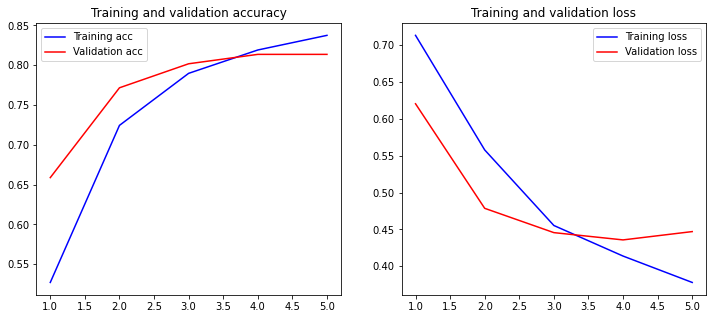

In [51]:
plot_history(history)

In [52]:
y_prob = model.predict(val_tweets)

In [53]:
y_pred = tf.round(y_prob)

In [54]:
y_pred

<tf.Tensor: shape=(762, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
 

In [55]:
from sklearn.metrics import f1_score

f1_score(val_labels, y_pred, average='weighted')

0.8123558654721007

In [57]:
test_tweets = test_df["text"]

In [59]:
predictions = tf.round(model.predict(test_tweets))

In [60]:
subm_df = pd.read_csv('/content/sample_submission.csv')
subm_df['target'] = [ int(x) for x in predictions ]
subm_df.to_csv('bert_submmsion.csv', index=False)